##Exception Handling

Write a function to add two numbers, if either of the arguements is not an int or float, throw a new ArguementsMustBeNumbers exception.

In [1]:
class ArguementsMustBeNumbers(Exception):
    None

In [2]:
def add_two(x,y):
    raise("todo")


In [3]:
ok_types = set([int,float])
def add_two(x,y):
    if type(x) not in ok_types or type(y) not in ok_types:
        raise ArguementsMustBeNumbers()
    return x + y


After this code is correctly implmented, the following code should print True 4 times.

In [4]:
print add_two(1,1)==2
try:
    add_two("t",1)
    print False
except ArguementsMustBeNumbers:
    print True
try:
    add_two(2,"f")
    print False
except ArguementsMustBeNumbers:
    print True
try:
    add_two("t","f")
    print False
except ArguementsMustBeNumbers:
    print True

True
True
True
True


##Unix Piping 

Below we generate a file called ps_out which contains a details about all processes on our machine.  In particular it is a csv file containing the PID, Username which owns the process, and the percent of the CPU time occupied by it.

We'll ask you to process this file using unix tools.

In [5]:
!ps -Ao "pid,user,%cpu" | sed "s/^ *//" | sed "s/  */,/g" > ps_out
!head ps_out

PID,USER,%CPU
1,root,0.0
2,root,0.0
3,root,0.0
5,root,0.0
7,root,0.0
8,root,0.0
9,root,0.0
10,root,0.0
11,root,0.0


First using **only unix tools** count the number of processes by each user is running

In [3]:
!cat ps_out | cut -d, -f 2 | sort | uniq -c

   1 USER
   1 _appleevents
   3 _assetcache
   2 _coreaudiod
   1 _distnote
   1 _iconservices
   1 _locationd
   1 _mdnsresponder
   1 _netbios
   1 _networkd
   1 _nsurlsessiond
   1 _nsurlstoraged
   2 _softwareupdate
   4 _spotlight
   1 _usbmuxd
   1 _windowserver
   2 admin
  97 root
   4 yfreund
 205 yoavfreund


Now again using **only unix tools** find the pid which is using the largest cpu %.

Your output should only be a single number (the process id consuming the largest cpu amount), i.e. `30048`

In [ ]:
#raise("Todo")

In [4]:
!cat ps_out | sort -t, -k 3,3nr | cut -d, -f 1 | head -1

144


##Directory Walking

Below we have written a program which uses os.walk, unix tools, and python to find the 3 longest files by line count within each directory under the /etc/ directory.

However, it is currently has several problems which you are tasked with fixing.

Here are the current problems which must be fixed:

1. the output is not sorted by line count
2. the "total" line listing the total lines across the directory is not a file and should be removed
3. more than three files are being printed
4. directories that contain no files are being printed

These issues should be resolved by using a combintation of python and or unix commands.  Please ensure the output format is not changed.

In [5]:
#Todo
import os
from itertools import chain,groupby
for d,ds,fs in os.walk("/etc"):
    lines = !wc -l $d/* 2> /dev/null | sed "s/^ *//"
    
    files = []
    for line in lines:
        try:
            fields = line.split(" ")
            files.append((int(fields[0]),fields[1]))
        except ValueError:
            print "Bad line: " + line
                        
    print "Longest files in " + d + ":"
    for lc, f in files:
        print "\t%s\t%d" %(f,lc)
    print

Longest files in /etc:
	/etc/6to4.conf.applesaved	20
	/etc/afpovertcp.cfg	20
	/etc/aliases	257
	/etc/appletalk.cfg	1
	/etc/appletalk.nvram.en0	1
	/etc/appletalk.nvram.en1	0
	/etc/asl.conf	31
	/etc/authorization.deprecated	9757
	/etc/authorization.user_modified	641
	/etc/auto_home	8
	/etc/auto_master	8
	/etc/autofs.conf	50
	/etc/bashrc	22
	/etc/com.apple.screensharing.agent.launchd	0
	/etc/crontab	4
	/etc/crontab.applesaved	4
	/etc/csh.cshrc	10
	/etc/csh.login	5
	/etc/csh.logout	1
	/etc/dnsextd.conf	60
	/etc/dumpdates	0
	/etc/efax.rc	42
	/etc/find.codes	0
	/etc/fstab.hd	3
	/etc/ftpd.conf	2
	/etc/ftpd.conf.default	2
	/etc/ftpusers	9
	/etc/gettytab	205
	/etc/group	115
	/etc/group~previous	109
	/etc/hostconfig.system_default	12
	/etc/hosts	9
	/etc/hosts.equiv	0
	/etc/hosts.lpd	0
	/etc/inetd.conf.applesaved	66
	/etc/irbrc	38
	/etc/kern_loader.conf	0
	/etc/kern_loader.conf.applesaved	0
	/etc/localtime	3
	/etc/locate.rc	26
	/etc/mail.rc	2
	/etc/man.conf	140
	/etc/manpaths	2
	/etc/moduli	262
	

Possible solution:

In [6]:
import os
from itertools import chain,groupby
for d,ds,fs in os.walk("/etc"):
    lines = !wc -l $d/* 2> /dev/null | sed "s/^ *//"
    
    files = []
    for line in lines:
        try:
            fields = line.split(" ")
            if fields[1] != "total":
                files.append((int(fields[0]),fields[1]))
        except ValueError:
            print "Bad line: " + line
            
    if len(files) == 0:
        continue
        
    files = sorted(files, key = lambda x: -x[0])
    files = files[:3]
    
    print "Longest files in " + d + ":"
    for lc, f in files:
        print "\t%s\t%d" %(f,lc)
    print

Longest files in /etc:
	/etc/services	13921
	/etc/authorization.deprecated	9757
	/etc/php.ini.default	1939

Longest files in /etc/apache2:
	/etc/apache2/mime.types	1596
	/etc/apache2/httpd.conf	540
	/etc/apache2/httpd.conf~previous	501

Longest files in /etc/apache2/extra:
	/etc/apache2/extra/httpd-ssl.conf	249
	/etc/apache2/extra/httpd-languages.conf	141
	/etc/apache2/extra/httpd-mpm.conf	119

Longest files in /etc/apache2/original:
	/etc/apache2/original/httpd.conf	540

Longest files in /etc/apache2/original/extra:
	/etc/apache2/original/extra/httpd-ssl.conf	249
	/etc/apache2/original/extra/httpd-languages.conf	141
	/etc/apache2/original/extra/httpd-mpm.conf	119

Longest files in /etc/apache2/other:
	/etc/apache2/other/iipsrv.conf	15
	/etc/apache2/other/php5.conf	8

Longest files in /etc/apache2/users:
	/etc/apache2/users/Guest.conf	6
	/etc/apache2/users/yoavfreund.conf	6

Longest files in /etc/asl:
	/etc/asl/com.apple.securityd	28
	/etc/asl/com.apple.networking.symptoms	23
	/etc/asl

##Linear Regression

In the file linear.csv there is a set of 100 x,y pairs of numbers in csv format.

About 10% of the lines have a missing y value.

Your goal is to do the following:

1. Preprocess the data to remove any points with a missing y value
2. Fit a linear regression model using sklearn's LinearRegression package
3. Plot a scatter plot of the populated x,y pairs as blue points and the best fit linear regression line in red

In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [9]:
data = pd.read_csv("./linear.csv")
data.head()

,x,y
0,82.583220,134.907414
1,73.922466,134.085180
2,34.887445,NaN
3,61.839983,114.530638
4,16.775940,31.376437


1. Preprocess the data to remove any points with a missing y value

In [ ]:
training_data = raise("todo")

Fit a linear regression model using sklearn's LinearRegression package

In [10]:
mdl = raise("todo")
m = mdl.coef_[0]
b = mdl.intercept_

SyntaxError: invalid syntax (<ipython-input-10-5fed1648db0b>, line 1)

In [11]:
training_data = data[~np.isnan(data["y"])]
mdl = LinearRegression().fit(training_data[["x"]],training_data["y"])
m = mdl.coef_[0]
b = mdl.intercept_

Plot a scatter plot of the populated x,y pairs as blue points and the best fit linear regression line in red

In [ ]:
#plot data and fit line here
raise("todo")

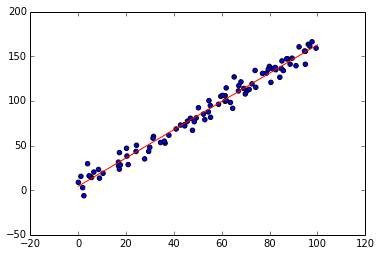

In [12]:
plt.scatter(data.x,data.y)
plt.plot([0,100],[b,m*100+b],'r')

In [13]:
print "formula: y = %f x + %f" % (m,b)

formula: y = 1.583197 x + 4.470197


##Object Oriented Model Selection

Throughout the quarter, several problems have involved choosing the best model from a set of candidate models to get the best accuracy.

Besides using it for selecting model hyperparmeters (as in grid search) or features, you can also use it to select the modeling techniques.  

This problem is in two steps:

1. We define four models by inheriting from a base model class.
2. We use train/test errors to choose the best model

#### The base model
We'll make each technique implement a common interface BaseModel given below. 

In [7]:
# Do not modify this code
class BaseModel:
    def __init__(self, train_x, train_y):
        """Abstract constructor, subclasses should train a model of their type here and store
           it in a way that predict can be used to compute predictions"""
        raise Exception("This is an abstract class")
        
    def predict(self, x):
        """Abstract method to compute a single prediction given a single example x"""
        raise Exception("This is an abstract class")
        
    def score(self, xs, ys):
        """Returns the accuracy of this model using xs as a list of inputs and ys as a list of correct values."""
        return sum([(self.predict(x)-y)**2 for x,y in zip(xs,ys)])/len(xs)
    

Now that you have implemented the BaseModel, implement a class for LinearModel, QuadraticModel, CubicModel, and QuarticModel. Use numpy's [polyfit](http://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html) function to fit these polynomials to the training data given as parameters `train_x, train_y` to the constructor.

The input to each model is the variable $x$ and the output is the variable $y$

* **LinearModel** $y=a_1x+a_0$
* **QuadraticModel** $y=a_2x^2+a_1x+a_0$
* **CubicModel** $y=a_3x^3+a_2x^2+a_1x+a_0$
* **QuarticModel** $y=a_4x^4+a_3x^3+a_2x^2+a_1x+a_0$


In [8]:
from numpy import polyfit

class LinearModel(BaseModel):
    def __init__(self, train_x, train_y):
        
        p = np.polyfit(train_x, train_y, 1) #calculating coefficients
        self.model = np.poly1d(p) #generating new polynomial from coefficents
        
        
    def predict(self, x):
        """Method to compute a single prediction given a single example x"""
        return self.model(x)

In [5]:
class QuadraticModel(BaseModel):
    def __init__(self, train_x, train_y):
        
        p = np.polyfit(train_x, train_y, 2)
        self.model = np.poly1d(p)
        
    def predict(self, x):
        """Method to compute a single prediction given a single example x"""
        return self.model(x)

In [6]:
class CubicModel(BaseModel):
    def __init__(self, train_x, train_y):
         
        p = np.polyfit(train_x, train_y, 3)
        self.model = np.poly1d(p)
        
    def predict(self, x):
        """Method to compute a single prediction given a single example x"""
        return self.model(x)

In [7]:
class QuarticModel(BaseModel):
    def __init__(self, train_x, train_y):
        
        p = np.polyfit(train_x, train_y, 4)
        self.model = np.poly1d(p)
        
    def predict(self, x):
        """Method to compute a single prediction given a single example x"""
        return self.model(x)

Now we evaluate each of these techniques on our data.  Fill in the parts of the function marked "TODO" below

In [9]:
#Load Data
import pandas as pd
train = pd.read_csv("train_data.csv")
valid = pd.read_csv("validation_data.csv")
train_x = train["x"].tolist()
train_y = train["y"].tolist()
valid_x = valid["x"].tolist()
valid_y = valid["y"].tolist()

In [10]:
import numpy as np
techniques = [LinearModel]
train_error = []
valid_error = []

for technique in techniques:
    mdl = technique(train_x,train_y)
    train_error.append(mdl.score(train_x,train_y))
    valid_error.append(mdl.score(valid_x,valid_y))

In [11]:
train_error

[76291.197119124321]

##Scraping

Started as a travel journal, Lonely Planet has gone on to become the world’s most successful travel publisher, and they maintain an award winning website giving all the necessary details a traveller could ask for. 
In this question we will try to use their website lonelyplanet.com to find the top sightseeing places in San diego and how far they are from our current location

In order to do this, we will scrape the website to find the top sightseeing places and develop a table containing the name of the place and its corresponding latitude, longitude values. We will then define a function to calculate distance between two points given their latitude and longitude.

You can take your current location as UCSD Rady School of Management, with Latitude 32.88661 and longitude -117.24128

In [15]:
from bs4 import BeautifulSoup
import requests
import urllib
import pandas as pd
import re

Below is a construct of how beautifulSoup accesses the website and retrieves data

In [16]:
website = "http://www.lonelyplanet.com"
country = "usa"
city = "san-diego"
scrape_topic = "sights"
base_url = website+"/"+country+"/"+city+"/"+scrape_topic+"/"
r  = requests.get(base_url)
data = r.text
soup = BeautifulSoup(data)

In [18]:
soup

<!DOCTYPE html>
<!--[if IE 7]><html class='no-js ie7 no-freight base ' data-topic="sights" lang='en'><![endif]--><!--[if IE 8]><html class='no-js ie8 no-freight base ' data-topic="sights" lang='en'><![endif]--><!--[if IE 9]><html class='no-js ie9 no-freight base ' data-topic="sights" lang='en'><![endif]--><!--[if gt IE 9]><!--><html class="no-js no-freight base " data-topic="sights" lang="en"><!--<![endif]-->
<head>
<meta content="Sights in San Diego, USA - Lonely Planet" name="title"/>
<meta content="111 sights in San Diego, USA - including San Diego Zoo, Hotel del Coronado, and Old Town State Historic Park." name="description"/>
<meta content="summary_large_image" name="twitter:card"/>
<meta content="@lonelyplanet" name="twitter:site"/>
<meta content="Sights in San Diego, USA - Lonely Planet" name="twitter:title"/>
<meta content="111 sights in San Diego, USA - including San Diego Zoo, Hotel del Coronado, and Old Town State Historic Park." name="twitter:description"/>
<meta content="L

Once you have retrieved the entire data from the website, the next step is to extract the URLs corresponding to specific sights.

In order to do so, we need to define a regular expression for the links in which we are interested. 

Browsing the HTML of the site we find URLs of the following type

    1. /usa/san-diego/sights/
    2. /usa/san-diego/sights/nature-wildlife/san-diego-zoo
    3. /usa/san-diego/sights/architecture/hotel-del-coronado
    4. /usa/san-diego/sights/?page2=id
    5. /usa/san-diego/sights/?page1=id+data=x 

URLs like 2,3 correspond to pages of sights that we are interested in. On the other hand, URLs like 1,4,5 correspond to other information which is not of interest.
 
Write a regex pattern which parses all links starting with /usa/san-diego/sights/ followed by more characters. Make sure that the pattern does not allow links with question marks such as 4,5.

In [19]:
pattern = '^/usa/san-diego/sights/+[^?]'

Use the code below to make a list of all useful urls

In [22]:
url_list = []
for link in soup.find_all('a',href=re.compile(pattern)):
    url_list.append(link.get('href'))
url_list

Now, visit each of the above found urls, use beautifulsoup to pull their data and then parse their names, latitudes and longitudes and store them in a list/dataframe.

Use the code snippets below in your code to parse individual contents

to parse name of the sightseeing point
 > name = soup.find('h1').get_text().strip()

to parse latitudes and longitudes from the sight pages
 > if div.has_attr('data-latitude'):
       lat = div['data-latitude']
       
       
 > if div.has_attr('data-longitude'):
       lng = div['data-longitude']

In [24]:
sights_list = []
for i in range(len(url_list)):
    new_row = []
    url = url_list[i]
    new_row.append(i+1)
    new_url = website+url
    r = requests.get(new_url)
    data = r.text
    soup = BeautifulSoup(data)
    new_row.append(soup.find('h1').get_text().strip())
    for div in soup.find_all('div'):
        if div.has_attr('data-latitude'):
            new_row.append(div['data-latitude'])
        if div.has_attr('data-longitude'):
            new_row.append(div['data-longitude'])
    t = tuple(new_row)
    sights_list.append(t)

In [25]:
sights_list

[(1, u'San Diego Zoo', '32.735288', '-117.151517'),
 (2, u'Hotel del Coronado', '32.67987211', '-117.18040515'),
 (3, u'Old Town State Historic Park', '32.755146', '-117.19815'),
 (4, u'USS Midway Museum', '32.714365', '-117.173666'),
 (5, u'Maritime Museum', '32.720795', '-117.173303'),
 (6, u'New Children\u2019s Museum', '32.710639', '-117.164257'),
 (7, u'San Diego Main Library', '32.708824', '-117.154083'),
 (8, u'Spreckels Organ Pavilion', '32.729363', '-117.150389'),
 (9,
  u'Museum of Contemporary Art San Diego \u2013 La Jolla',
  '32.844404',
  '-117.278012'),
 (10, u'Mingei International Museum', '32.73098', '-117.151002'),
 (11, u'California Surf Museum', '33.199281', '-117.383871'),
 (12, u'Cave Store', '32.849393', '-117.270432')]

Now that we have a table of sightseeiing places imediately around us along with their latitudes and longitudes, use the below function to find distance of each of the sightseeing place from your current location

In [27]:
import math
def getDistanceFromLatLonInKm(lat1,lon1,lat2,lon2) :
    R = 6371 # Radius of the earth in km
    dLat = deg2rad(lat2-lat1) # deg2rad below
    dLon = deg2rad(lon2-lon1) 
    a = math.sin(dLat/2)*math.sin(dLat/2)+math.cos(deg2rad(lat1))*math.cos(deg2rad(lat2))*math.sin(dLon/2)*math.sin(dLon/2)

    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = R * c #Distance in km
    return d


def deg2rad(deg) :
  return deg * (3.1416/180)


In [28]:
myLat = 32.88661
myLng = -117.24128
for i in range(len(sights_list)):
    dist = getDistanceFromLatLonInKm(float(sights_list[i][2]),float(sights_list[i][3]),myLat,myLng)
    print "Distance of "+ sights_list[i][1] + " from my location is "+str(dist) + "kms!"
    

Distance of San Diego Zoo from my location is 18.8014912838kms!
Distance of Hotel del Coronado from my location is 23.6821824254kms!
Distance of Old Town State Historic Park from my location is 15.163570048kms!
Distance of USS Midway Museum from my location is 20.1684911849kms!
Distance of Maritime Museum from my location is 19.5017525396kms!
Distance of New Children’s Museum from my location is 20.8494855789kms!
Distance of San Diego Main Library from my location is 21.3831144844kms!
Distance of Spreckels Organ Pavilion from my location is 19.4392919741kms!
Distance of Museum of Contemporary Art San Diego – La Jolla from my location is 5.81333659022kms!
Distance of Mingei International Museum from my location is 19.252515431kms!
Distance of California Surf Museum from my location is 37.2213559843kms!
Distance of Cave Store from my location is 4.95366839227kms!


## MatplotLib


In [9]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In this exercise we will plot a list of datasets in the form of histograms in the same plot. For this we will use the function plotHistograms given below, which takes a dataset, and bin count and outputs a histogram plot containing multiple horizonta bars.

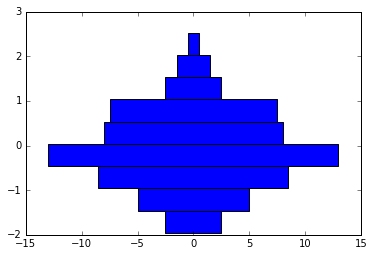

In [11]:
ax = plt.subplot(111)
def plotHistograms(data,binCount):
    minVal=np.min(data)
    maxVal=np.max(data)
    hist=np.histogram(data, range=(minVal,maxVal), bins=binCount)
    bin_edges = np.linspace(minVal, maxVal, binCount+1)
    centers = .5 * (bin_edges + np.roll(bin_edges, 1))[:-1]
    heights = np.diff(bin_edges)
    ax=plt.subplot(111)
    lefts = 0 - .5 * hist[0]
    ax.barh(centers, hist[0], height=heights, left=lefts)

data=np.random.normal(0, 1, 100)
binCount=10
plotHistograms(data,binCount)

Use the above function to plot multiple histograms on the same plot corresponding to the datasets given below. An example graph below shows how multiple histograms can be accommodated in the same plot. Use bin count of 100 for each of the histograms. You are free to modify the function, or write your own

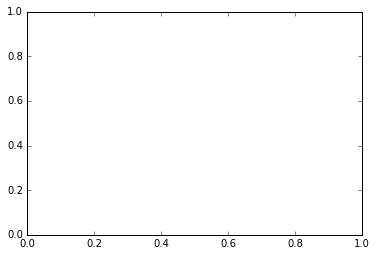

In [12]:
number_of_data_points = 100
data_sets = [np.random.normal(0, 1, number_of_data_points),
             np.random.normal(6, 1, number_of_data_points),
             np.random.normal(-3, 1, number_of_data_points),
             np.random.normal(3, 1, number_of_data_points),
             np.random.normal(-6, 1, number_of_data_points),
             np.random.normal(12, 1, number_of_data_points)
            ]
ax = plt.subplot(111)
#Write code here


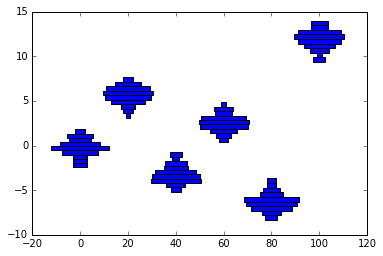

In [13]:
#following is a simple tweak to the function to allow multiple plots
ax = plt.subplot(111)
def plotHistograms(data,binCount,left):
    minVal=np.min(data)
    maxVal=np.max(data)
    hist=np.histogram(data, range=(minVal,maxVal), bins=binCount)
    bin_edges = np.linspace(minVal, maxVal, binCount+1)
    centers = .5 * (bin_edges + np.roll(bin_edges, 1))[:-1]
    heights = np.diff(bin_edges)
    ax=plt.subplot(111)
    lefts = left - .5 * hist[0]
    ax.barh(centers, hist[0], height=heights, left=lefts)


binCount=10
i=0
for data in data_sets:
    plotHistograms(data,binCount,i)
    i+=20